# Leren: Programming assignment 6

**Student 1:**  <span style="color:red">Tycho Koster</span> (<span style="color:red">10667687</span>)<br>
**Student 2:** <span style="color:red">David Stap</span> (<span style="color:red">10608516</span>)<br>

In [95]:
import math
import numpy as np
from numpy import genfromtxt
import operator
import random
import matplotlib.pyplot as plt

In [96]:
# Import X and y from csv file
def read_logistic_data(filename):
    my_data = genfromtxt(filename, delimiter=';')
    X = []
    y= []
    for i in range(len(my_data)):
        new_data = my_data[i]
        y.append([new_data[-1]])
        X.append(np.delete(new_data, -1))
    return X, y

X_train, y_train = read_logistic_data('digits123-1.csv')
X_test, y_test = read_logistic_data('digits123-2.csv')

### Question 1: k-means clustering

In [98]:
def random_means(k, X):
    initialWeight = []
    for i in range(k):
        rand_x = int(random.uniform(0, len(X)-1))
        initialWeight.append(X[rand_x])
                
    return initialWeight

In [99]:
# finds best initialization of means by finding lowest cost value for 25 pairs of means.
def best_rnd_means(k, X):
    lowest_cost = 9999
    for i in range(25):
        rand_means = random_means(k, X)
        means, clusters = KMeans(X, k, 15, rand_means)
        cost = J(means, clusters, X)
        
        if cost < lowest_cost:
            lowest_cost = cost
            best_rnd_means = rand_means

    return best_rnd_means

In [100]:
def KMeans(X, k, iterations, means):    
    for i in range(iterations):
        # Initialize lists to store assigned values in clusters
        clusters = list()
        for i in range(len(means)):
            clusters.append([])

        # Assign all training examples to a cluster
        for i in range(len(X)):
            distance = 9999
            for j in range(len(means)):
                euclidean = math.sqrt(sum((X[i]-means[j])**2))
                # Find the cluster with smallest euclidean distance
                if euclidean < distance:
                    result = j
                    distance = euclidean
            clusters[result].append(i)
        
        # Update cluster means
        for i in range(len(clusters)):
            mean_sum = 0
            for x in clusters[i]:
                mean_sum += X[x]
            if (len(clusters[i]) > 0):
                mean_sum = mean_sum / len(clusters[i])  
            means[i] = mean_sum
 
    return means, clusters

In [101]:
def J(means, clusters, X):
    cost_sum = 0
    cluster_means = []    
    for i in range(len(clusters)):
        for x in clusters[i]:
            cost_sum += sum((X[x]-means[i])**2)
    
    return cost_sum / len(X)

In [104]:
# Example run: random means initialization (pick random mean that has lowest cost)
means = best_rnd_means(3, X_train)
means, clusters = KMeans(X_train, k, 15, rand_means)

np.set_printoptions(precision=2, suppress=True)

print 'Total cost: ', J(means, clusters, X_train)
for i in range(len(means)):
    print means[i]
    print 'Number of training examples assigned to mean: ', len(clusters[i])
    print '-------------------------------------------------------------------------'

Total cost:  436.989337549
[  0.     2.16  13.58  14.71   5.42   0.61   0.     0.     0.     8.63
  14.95  12.87  11.24   1.61   0.     0.     0.     6.63   7.26   5.37
  13.05   2.26   0.     0.     0.     0.34   0.61   5.45  13.16   1.76   0.
   0.     0.     0.     0.18   9.95  11.16   0.45   0.     0.     0.     0.03
   3.37  14.71   7.82   2.66   1.76   0.03   0.     1.24  12.92  15.68
  13.79  13.79  10.5    0.42   0.     2.24  14.05  14.42  12.08   9.68
   5.76   0.42]
Number of training examples assigned to mean:  38
-------------------------------------------------------------------------
[  0.     2.22  13.5   15.56   9.78   1.39   0.     0.     0.11   6.5   13.5
  11.11  13.17   4.17   0.     0.     0.     1.94   3.     6.33  12.94
   3.33   0.     0.     0.     0.     0.83   9.33  11.78   1.11   0.     0.
   0.     0.     3.94  14.28   5.83   0.06   0.     0.     0.     0.78
  10.94  12.39   1.39   0.5    0.61   0.06   0.     3.89  15.56  10.56
   8.17   9.22   5.11   0.11 

In [106]:
# Example run: handselected values for mean.
means, clusters = KMeans(X_train, 3, 15, [X_train[0], X_train[150], X_train[299]])

print 'Total cost: ', J(means, clusters, X_train)
for i in range(len(means)):
    print means[i]
    print 'Number of training examples assigned to mean: ', len(clusters[i])
    print '-------------------------------------------------------------------------'

Total cost:  698.907441236
[  0.     0.09   3.29  12.9   12.44   4.34   0.55   0.01   0.     0.4
   5.78  14.51  15.04   7.26   0.79   0.01   0.03   1.07   6.31  14.29
  15.12   6.19   0.25   0.     0.01   1.51   7.25  14.88  14.53   3.81
   0.05   0.     0.     0.68   6.91  14.79  13.64   2.65   0.01   0.     0.
   0.41   7.04  14.55  13.66   2.45   0.     0.     0.     0.21   5.9
  14.25  13.41   3.17   0.09   0.     0.     0.05   3.58  12.19  12.9
   3.67   0.19   0.  ]
Number of training examples assigned to mean:  80
-------------------------------------------------------------------------
[  0.     1.36  11.82  14.56   7.16   0.96   0.     0.     0.02   5.56
  13.74  12.26  10.99   3.23   0.03   0.     0.     3.79   7.6    6.24
  11.51   3.98   0.03   0.     0.     0.35   1.83   6.28  12.36   3.17   0.
   0.     0.     0.03   0.96   8.71  11.27   1.73   0.     0.     0.     0.16
   3.78  11.3    8.67   2.52   0.88   0.02   0.     1.37  11.45  14.06
  12.71  11.54   8.49   1.01   

### Question 2: optimized k

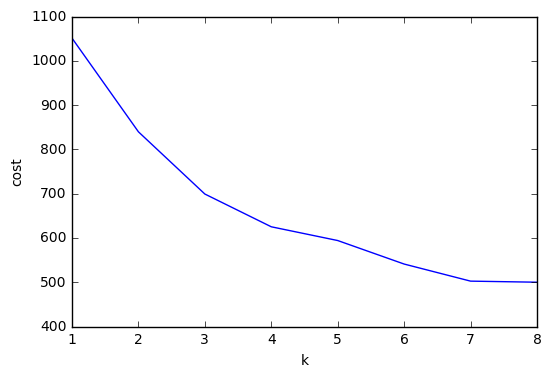

In [107]:
cost = []
k_list = []
rand_means = random_means(9, X_train)
for k in range(1,9):
    means, clusters = KMeans(X_train, k, 15, rand_means[0:k])
    cost.append(J(means, clusters, X_train))
    k_list.append(k)
    
plt.plot(k_list, cost)
plt.ylabel("cost")
plt.xlabel("k")
plt.show()

After applying the elbow method, it becomes clear that 3 is the optimal number for k (as suspected).

In [ ]:
# TODO

# run random mean initialization x times, pick one that results in lowest cost

### Question 3: compare cluster labels to given labels

In [156]:
means, clusters = KMeans(X_train, 3, 15, [X_train[0], X_train[150], X_train[299]])
wrong = []
for i in range(len(clusters)):
    wrong.append([])
    for x in clusters[i]:
        if y_train[x][0] != i+1:
            wrong[i].append(x)


            
for i in range(len(clusters)):
    print "Classified Cluster", i+1,":"
    print wrong[i]


Classified Cluster 1 :
[238, 277, 278, 279, 280, 281, 290, 292]
Classified Cluster 2 :
[3, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Classified Cluster 3 :
[14, 50, 52, 55, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 108, 110, 130, 150, 151, 152, 153, 154, 156, 158, 175, 177, 179, 181, 184]


## Discussion

The data shown above are all the errors that were made by the k-means classifier. It shows the label that was given by the dataset below the cluster that it was classified under.

It is noticable that cluster 3 has the most errors with classifying the digits data. Cluster 1 only has errors with data that was originally from cluster 3. Cluster 2 has the same problem with cluster 1.

### Question 4: Anomalous detection

In [172]:
means, clusters = KMeans(X_train, 3, 15, [X_train[0], X_train[150], X_train[299]])
wrong_data = []
anomalous_sets = []
normal_data = []
for i in range(len(clusters)):
    for x in clusters[i]:
        euclidean = math.sqrt(sum((X_train[x]-means[i])**2))
        if euclidean > 30:
            anomalous_sets.append(x)
        if y_train[x][0] != i+1:
            wrong_data.append(euclidean)
        else:
            normal_data.append(euclidean)
        
       

print "Wrongly classified euclidean distance to means sorted:"
print sorted(wrong_data, reverse=True)
print
print "Correctly classified distance to means sorted:"
print sorted(normal_data, reverse=True)
print
print "Index of the anomalous datapoints sorted:"
print sorted(anomalous_sets)

Wrongly classified euclidean distance to means sorted:
[42.16283492041394, 41.63949454146789, 41.32553552733848, 40.987104603328255, 40.89405453296512, 40.22977513305581, 40.016741111202414, 38.52362558081932, 38.176780289699416, 38.145792348867296, 37.724983432733275, 37.68591856449683, 37.57477050741371, 37.34400052217224, 37.21887063125048, 37.05795393857274, 37.05388458463959, 37.02259988836996, 36.784454382265835, 36.240852294061746, 36.00428933000126, 35.85096860774306, 35.70167237582629, 35.30942733419902, 35.28169797303653, 35.25674377845195, 35.01731835869237, 34.7977487525206, 34.185393905330166, 33.57469588963737, 33.55814915933238, 33.215360965698274, 33.06848008300352, 33.03494851107311, 32.9856613527042, 32.96984952677244, 32.80616300431612, 32.7696125346171, 32.7643150320611, 32.47962240290116, 32.475036552629355, 32.35011662036899, 32.163617634210986, 32.110736132950926, 31.913285420474267, 31.879265574393298, 31.67929393782464, 31.483024616486063, 30.69200832464373, 30

## Discussion


We created two lists with distances, one for the instances that are in the wrong cluster (i.e. cluster label is not most frequent class in cluster) and one for the instances that are in the correct cluster. As can be seen above, all instances in the wrong cluster have a relatively high distance to the cluster.
After inspecting the data, we came up with the following definition: Anomalous iff distance > 30

### Question 5: Anomalies inspection:

In [171]:
print "A normal cluster 1:"
print X_train[1]
print "An anomaly cluster 1:"
print X_train[38]
print "A normal cluster 2:"
print X_train[60]
print "An anomaly cluster 2:"
print X_train[3]
print "A normal cluster 3:"
print X_train[200]
print "An anomaly cluster 3:"
print X_train[175]

A normal cluster 1:
[  0.   0.   4.  10.  11.   4.   0.   0.   0.   1.  11.  16.  16.  14.   0.
   0.   0.   4.  16.  16.  16.  12.   0.   0.   0.   4.  16.  16.  16.   7.
   0.   0.   0.   4.  16.  16.  16.   8.   0.   0.   0.   4.  16.  16.  16.
   7.   0.   0.   0.   3.  15.  16.  16.  12.   0.   0.   0.   0.   5.  12.
  12.  12.   1.   0.]
An anomaly cluster 1:
[  0.   0.   0.   0.  13.  12.   0.   0.   0.   0.   0.  10.  16.  14.   0.
   0.   0.   1.  12.  16.  16.  11.   0.   0.   0.  11.  16.  12.  16.   8.
   0.   0.   0.   6.   4.   7.  16.   6.   0.   0.   0.   0.   0.   6.  16.
   5.   0.   0.   0.   0.   0.   4.  16.   8.   0.   0.   0.   0.   0.   0.
  15.  11.   0.   0.]
A normal cluster 2:
[  0.   0.   2.  16.  10.   0.   0.   0.   0.   0.   3.  16.  16.   1.   0.
   0.   0.   0.   5.  16.  14.   0.   0.   0.   0.   0.   3.  16.  13.   0.
   0.   0.   0.   0.   1.  16.  15.   0.   0.   0.   0.   0.   1.  16.  16.
   0.   0.   0.   0.   0.   2.  16.  15.   2.   0.   0.   

### Discussion

As we can see from the datapoints that are presented above. There is a lot of big differences between the datapoints that are considered normal and that are consideren anomaly so they do make sense, because they dont really look like eachother. Another thing we noticed is that datapoints in cluster 2 and 3 look relativaly similar, this is also why the classifier makes a lot of errors in seperating these two classes. A lot of classify errors come from 2 being classified as 3 and vice versa.